In [8]:
##Original structure scans each file individually for specific channel to import data,
##    new structure creates a dictionary to refer to, cuts time of get_data() (for 4 data calls) from 30 seconds to .5, but adds 20 seconds
##    to importdata()


import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import time
import TDMS_MHD as MHD
%matplotlib inline


class MolyPlots(MHD.TDMS,MHD.TDMS_np):
    def __init__(self, ):
        MHD.TDMS.__init__(self)
        MHD.TDMS_np.__init__(self)

    def get_times(self, ):
        imports = self.imports
        data = self.data
        tracks = self.tracks
        tracks["Time"] = 0
        for string in imports:
            file = imports[string]
            data[string] = file.object("Global", "Time").data
            
        self.data = data
        self.tracks = tracks
        return
        
        ##Fills the data dictionary with initial arrays of time, to stack with other data in future
    
    def get_motor(self,):
        motortrack = "motor A"
        #group = "Motors"
        self.get_data(motortrack)
        return
    
        ##Calls motor position from motor A for current set up
        
    def get_tc(self, ):
        tctrack = "T_Sample (Arith. Mean)"
        self.get_data(tctrack)
        ##run get data with thermocouple data from the sample holder    
        return
    
    def get_blackbody(self,):
        tracks = self.tracks
        data = self.data
        
        ct1 = "Color Temp 2-3"
        ct2 = "Color Temp 1-3"
        ct3 = "Color Temp 1-2"
        self.get_data(ct1)
        self.get_data(ct2)
        self.get_data(ct3)
        
        tracks["Color Temp Avg."] = len(tracks)
        
        for sample in data:
            temp1 = data[sample][tracks[ct1]]
            temp2 = data[sample][tracks[ct2]]
            temp3 = data[sample][tracks[ct3]]
            ctavg = np.mean(np.vstack((temp1,temp2,temp3)),0)
            self.store_data(sample, ctavg)
            
        self.tracks = tracks
        return
        ##gets all two color temperatures and stores them, then calculates the averages and stores that as well
    
    def align(self, channel="motor A"):
        data = self.data
        tracks = self.tracks
        track = "Rel Time"
        
        if track not in tracks:
            for sample in data:
                time = data[sample][tracks["Time"]]
                motor = data[sample][tracks[channel]]
                start = np.where(motor[1:]-motor[:-1]>.2)
                start = start[0][1]
                timerel = np.zeros_like(time)
                for i, val in enumerate(time):
                    timerel[i] = (time[i]-time[start]).total_seconds()
                    if np.isclose(timerel[i],2000, rtol=.0001):
                        self.stop = i
                    if np.isclose(timerel[i],0,rtol=.0001):
                        self.start = i
                self.store_data(sample, timerel)
                
            tracks[track] = len(tracks)
        self.tracks = tracks
        return
        ##Creates a relative time array, for comparing different samples, and aligns the start time of burning the sample
        ##    with the motors position
        ##In future experiments, the align function might be used with other channels, and is anticipated to be made more general

    def plot_tc(self, samples="all"):
        self.get_tc()
        self.align()
        data = self.data
        tracks = self.tracks
        track = "T_Sample (Arith. Mean)"
        
        axes = plt.gca()
        axes.set_xlim([0,1500])
        plt.ylabel("Temperatue (C)")
        plt.xlabel("Time (s)")
        
        if samples == "all":
            samples = self.samples
        
        for sample in samples:
            for path in data:
                if sample in path:
                    plt.plot(data[path][tracks['Rel Time']], data[path][tracks[track]], label = sample)
        plt.title("Themocouple Temp. ")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        return

    def plot_bb(self, samples="all"):
        self.get_blackbody()
        data = self.data
        tracks = self.tracks
        track = "Avg Color Temp"
        
        axes = plt.gca()
        plt.ylabel("Temperature (K)")
        plt.xlabel("Time (s)")
        axes.set_xlim([0,1300])
        axes.set_ylim([0, 2500])
        if samples == "all":
            samples = self.samples
        
        for sample in samples:
            for path in data:
                if sample in path:
                    plt.plot(data[path][tracks['Rel Time']], data[path][tracks[track]], label = sample)
        plt.title("Two Color Temp. ")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        return

Error: trying to store duplicate data


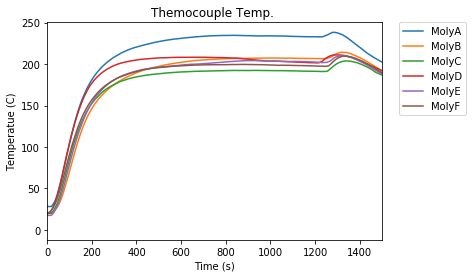

In [9]:
a = MolyPlots()
a.set_pathnames("D:\\Data\\MolyRod", "13mm_together.tdms")
a.import_data("13mm_together.tdms")
a.createref()
a.get_times()
a.get_motor()
a.get_tc()
a.get_blackbody()
a.align()
a.plot_tc()

Error: trying to store duplicate data


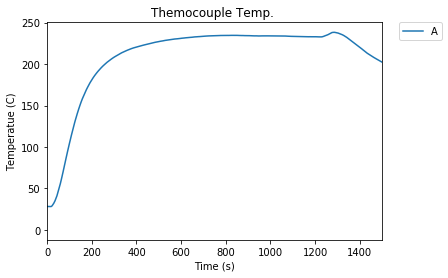

In [7]:
a.plot_tc("A")

In [3]:
print(a.tracks)

{'Time': 7, 'motor A': 1, 'T_Sample (Arith. Mean)': 2, 'Color Temp 2-3': 3, 'Color Temp 1-3': 4, 'Color Temp 1-2': 5, 'Color Temp Avg.': 6, 'Init Time': 0}
